# Minimal OpenSCM-Runner example with FaIR

Requires fair >= 1.6.0a3 and < 2.0.0

In [1]:
import openscm_runner

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler
/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner-zn/src/openscm_runner/run.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.1.0+22.g452370a.dirty


In [3]:
import os.path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyam
from fair.forward import fair_scm
from fair.tools.scmdf import scmdf_to_emissions
from scmdata import ScmDataFrame
from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR

In [4]:
fair = FAIR()

In [5]:
fair.get_version()

'1.6.0a5+8.g4046216'

In [6]:
# NBVAL_IGNORE_OUTPUT
df_fair = ScmDataFrame(
    os.path.join(
        "..", "tests", "test-data", "rcmip_scen_ssp_world_emissions.csv"
    )
)

df_fair.head()

/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner-zn/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: ScmDataFrame has been deprecated and will be removed in v0.6.0. Use the ScmRun class instead
  after removing the cwd from sys.path.


time                                                 2015-01-01 00:00:00  \
model   scenario region variable        unit                               
AIM/CGE ssp370   World  Emissions|BC    Mt BC/yr                9.727424   
                        Emissions|C2F6  kt C2F6/yr              1.570000   
                        Emissions|C6F14 kt C6F14/yr             0.350000   
                        Emissions|CF4   kt CF4/yr              10.869900   
                        Emissions|CH4   Mt CH4/yr             388.072796   

time                                                 2020-01-01 00:00:00  \
model   scenario region variable        unit                               
AIM/CGE ssp370   World  Emissions|BC    Mt BC/yr               10.227893   
                        Emissions|C2F6  kt C2F6/yr              2.018300   
                        Emissions|C6F14 kt C6F14/yr             0.449891   
                        Emissions|CF4   kt CF4/yr              12.751283   
                        Emissions|CH4   Mt CH4/yr             418.454212   

time                                                 2030-01-01 00:00:00  \
model   scenario region variable        unit                               
AIM/CGE ssp370   World  Emissions|BC    Mt BC/yr               10.687554   
                        Emissions|C2F6  kt C2F6/yr              1.357400   
                        Emissions|C6F14 kt C6F14/yr             0.302626   
                        Emissions|CF4   kt CF4/yr              10.327405   
                        Emissions|CH4   Mt CH4/yr             471.330793   

time                                                 2040-01-01 00:00:00  \
model   scenario region variable        unit                               
AIM/CGE ssp370   World  Emissions|BC    Mt BC/yr               11.006388   
                        Emissions|C2F6  kt C2F6/yr              0.934400   
                        Emissions|C6F14 kt C6F14/yr             0.208315   
                        Emissions|CF4   kt CF4/yr               8.776119   
                        Emissions|CH4   Mt CH4/yr             515.545705   

time                                                 2050-01-01 00:00:00  \
model   scenario region variable        unit                               
AIM/CGE ssp370   World  Emissions|BC    Mt BC/yr               10.945712   
                        Emissions|C2F6  kt C2F6/yr              0.663700   
                        Emissions|C6F14 kt C6F14/yr             0.147921   
                        Emissions|CF4   kt CF4/yr               7.783328   
                        Emissions|CH4   Mt CH4/yr             558.974274   

time                                                 2060-01-01 00:00:00  \
model   scenario region variable        unit                               
AIM/CGE ssp370   World  Emissions|BC    Mt BC/yr               10.581617   
                        Emissions|C2F6  kt C2F6/yr              0.490500   
                        Emissions|C6F14 kt C6F14/yr             0.109300   
                        Emissions|CF4   kt CF4/yr               7.147934   
                        Emissions|CH4   Mt CH4/yr             602.318529   

time                                                 2070-01-01 00:00:00  \
model   scenario region variable        unit                               
AIM/CGE ssp370   World  Emissions|BC    Mt BC/yr               10.203875   
                        Emissions|C2F6  kt C2F6/yr              0.379600   
                        Emissions|C6F14 kt C6F14/yr             0.084573   
                        Emissions|CF4   kt CF4/yr               6.741338   
                        Emissions|CH4   Mt CH4/yr             647.129406   

time                                                 2080-01-01 00:00:00  \
model   scenario region variable        unit                               
AIM/CGE ssp370   World  Emissions|BC    Mt BC/yr                9.761072   
                        Emissions|C2F6  k

In [7]:
# NBVAL_IGNORE_OUTPUT
x = run(
    climate_models_cfgs={
        "FAIR": [
            {}
        ],  # passing an empty list of an empty dict will run with defaults
    },
    scenarios=df_fair,
    output_variables=(
        "Surface Temperature", 
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
    ),
)

In [8]:
# NBVAL_IGNORE_OUTPUT
x.head()

time                                                                                                                 1765-01-01  \
model   scenario                  region variable                             unit   climate_model           run_id               
AIM/CGE ssp370                    World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 3         0.007853   
        ssp370-lowNTCF-aerchemmip World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 4         0.007853   
        ssp370-lowNTCF-gidden     World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 5         0.007853   
        ssp370                    World  Effective Radiative Forcing          W/m**2 FaIRv1.6.0a5+8.g4046216 3         0.072719   
                                         Effective Radiative Forcing|Aerosols W/m**2 FaIRv1.6.0a5+8.g4046216 3         0.020221   

time                                                                                                                 1766-01-01  \
model   scenario                  region variable                             unit   climate_model           run_id               
AIM/CGE ssp370                    World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 3         0.013012   
        ssp370-lowNTCF-aerchemmip World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 4         0.013012   
        ssp370-lowNTCF-gidden     World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 5         0.013012   
        ssp370                    World  Effective Radiative Forcing          W/m**2 FaIRv1.6.0a5+8.g4046216 3         0.055448   
                                         Effective Radiative Forcing|Aerosols W/m**2 FaIRv1.6.0a5+8.g4046216 3        -0.013861   

time                                                                                                                 1767-01-01  \
model   scenario                  region variable                             unit   climate_model           run_id               
AIM/CGE ssp370                    World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 3         0.017510   
        ssp370-lowNTCF-aerchemmip World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 4         0.017510   
        ssp370-lowNTCF-gidden     World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 5         0.017510   
        ssp370                    World  Effective Radiative Forcing          W/m**2 FaIRv1.6.0a5+8.g4046216 3         0.079659   
                                         Effective Radiative Forcing|Aerosols W/m**2 FaIRv1.6.0a5+8.g4046216 3        -0.009536   

time                                                                                                                 1768-01-01  \
model   scenario                  region variable                             unit   climate_model           run_id               
AIM/CGE ssp370                    World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 3         0.030108   
        ssp370-lowNTCF-aerchemmip World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 4         0.030108   
        ssp370-lowNTCF-gidden     World  Surface Temperature                  K      FaIRv1.6.0a5+8.g4046216 5         0.030108   
        ssp370                    World  Effective Radiative Forcing          W/m**2 FaIRv1.6.0a5+8.g4046216 3         0.218857   
                                         Effective Radiative Forcing|Aerosols W/m**2 FaIRv1.6.0a5+8.g4046216 3         0.068855   

time                                                                                                                 1769-01-01  \
model   scenario                  region variable                             unit   climate_model           run_id               
AIM/CGE ssp370                    World  Surface Temperature      

Note in the plots below that 'model' is the IAM that produced the scenario. In all cases, the climate model is FaIR.

In [9]:
x.get_unique_meta("climate_model", no_duplicates=True)

'FaIRv1.6.0a5+8.g4046216'

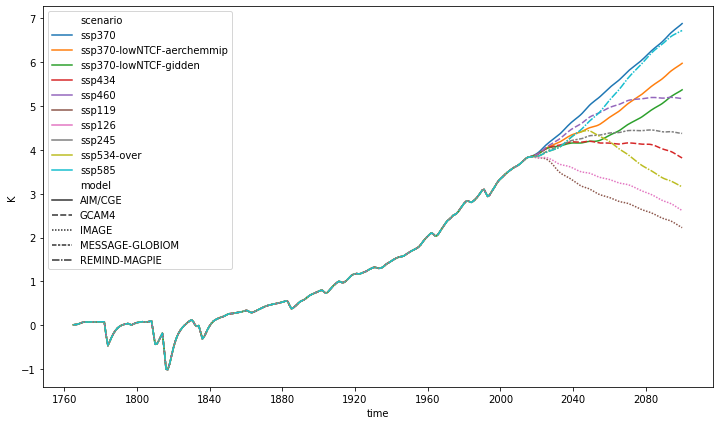

In [10]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Surface Temperature").lineplot(
    hue="scenario", style="model", ax=ax
)

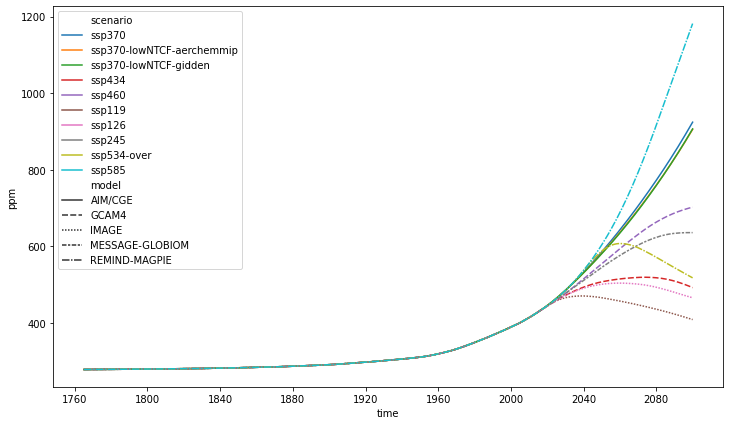

In [11]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Atmospheric Concentrations|CO2").lineplot(
    hue="scenario", style="model", ax=ax
)

@chrisroadmap: The ssp245 historical emissions are very much non-zero in the past (plot below), which might be causing your aerosol routine to explode?

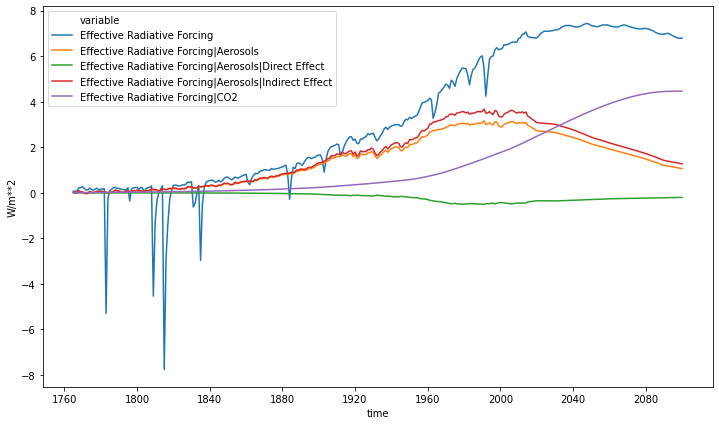

In [12]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
x.filter(variable="Effective Radiative Forcing*", scenario="ssp245").lineplot(
    hue="variable", ax=ax
)

In [13]:
rcmip_hist_emms = ScmDataFrame("rcmip-emissions-annual-means-4-0-0-ssp-only.csv")

/Users/znicholls/Documents/AGCEC/MCastle/openscm-runner-zn/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: ScmDataFrame has been deprecated and will be removed in v0.6.0. Use the ScmRun class instead
  """Entry point for launching an IPython kernel.


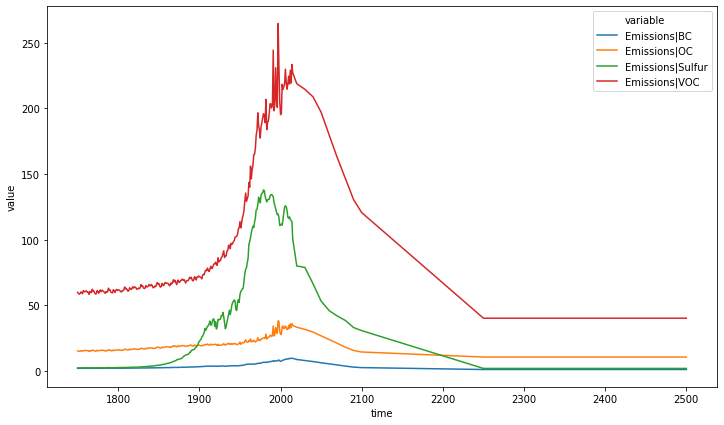

In [14]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
rcmip_hist_emms.filter(
    scenario="ssp245", 
    region="World", 
    variable=["*BC", "*Sulfur", "*OC"]
).lineplot(hue="variable", ax=ax)